In [68]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy
import aubio
from scipy.signal import find_peaks
from itertools import chain

In [33]:
def num_frames(y, sr, window_dur,shift_dur):
    i = 0
    frames = []
    t =np.array(range(len(y)))/sr
    frame_length = int(np.round((sr * window_dur) / 1000))
    shift_length = int(np.round((sr * shift_dur) / 1000))
    times =[]
    while i < len(y):
        frame = y[i:i + frame_length]
        times.append((t[i:i+frame_length]))
        i = i + shift_length
        frames.append(frame)
    return frames,times

In [34]:
audio_file = "../wavs/name.wav"
y, sr = librosa.load(audio_file)
frames,times = num_frames(y,sr,20,10)
print(len(frames),len(frames[1]))

88 441


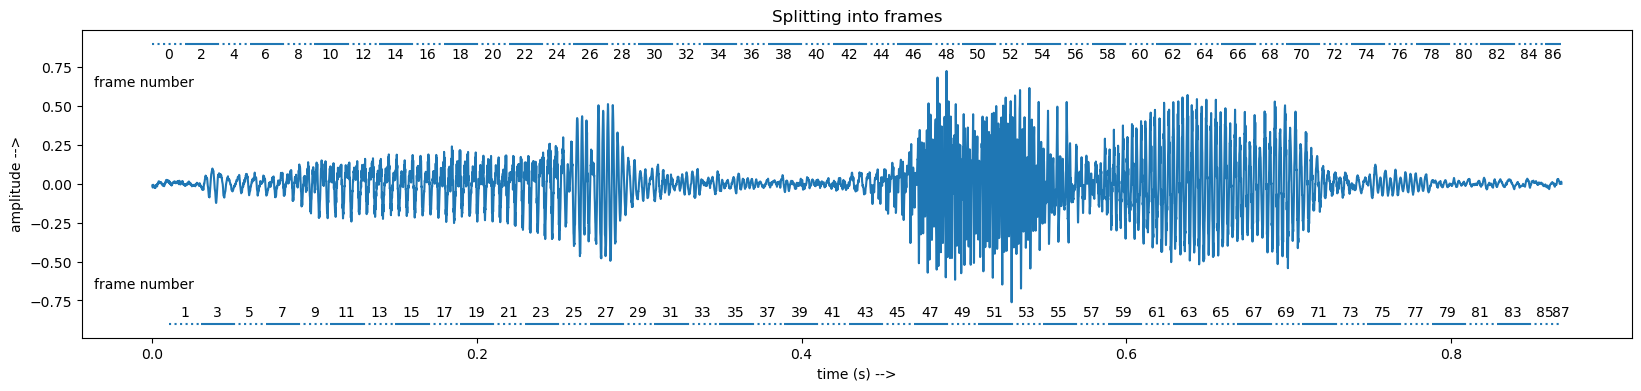

In [35]:
t =np.array(range(len(y)))/sr
fig,ax = plt.subplots(figsize = (20,4))
ax.plot(t,y);
i_even = 0
i_odd = 0
for i in range(len(frames)):
    if( i & 1):
        if(i_even):
            temp = "solid"
        else:
            temp = "dotted"
        ax.hlines(y=[-0.9],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
        ax.text(x=(times[i][0] + times[i][-1]) / 2, y=-0.9+0.07, s=str(i), ha='center', va='center')
        i_even = not (i_even)
    else:
        if(i_odd):
            temp = "solid"
        else:
            temp = "dotted"
        i_odd = not (i_odd)
        ax.hlines(y=[0.9],xmin = times[i][0],xmax = times[i][-1],linestyles=temp)
        ax.text(x=(times[i][0] + times[i][-1]) / 2, y=0.9-0.07, s=str(i), ha='center', va='center')
ax.text(x = -0.005,y = -0.8+0.15,s=f"frame number",ha = 'center',va ='center');
ax.text(x = -0.005,y = 0.8-0.15,s=f"frame number",ha = 'center',va ='center');
ax.set_xlabel("time (s) -->")
ax.set_ylabel("amplitude -->")
ax.set_title("Splitting into frames");
        

## d) MFCC

In [71]:
def mfcc(y, sr, window_dur, window_shape, shift_dur):
    i = 0
    mfccs = []

    frame_length = int(np.round((sr * window_dur) / 1000))
    shift_length = int(np.round((sr * shift_dur) / 1000))

    while i < len(y):
        frame = y[i:i + frame_length]

        if window_shape == 'hann':
            window = np.hanning(frame_length)
        elif window_shape == 'rect':
            window = np.ones(frame_length)
        
        if(len(frame)<frame_length):
            frame = np.concatenate((frame,np.zeros(frame_length-len(frame))),axis=0)
        
        frame = frame * window  # Apply the window function
        temp_list = librosa.feature.mfcc(y=frame, sr=sr, n_mfcc=13).tolist()
        mfccs.append(list(chain.from_iterable(temp_list)))
        i = i + shift_length
    mfcc_feat = np.array(mfccs).T
    
    return mfcc_feat

In [101]:
num_frames = 88
time_vector=(np.arange(0, num_frames) * (shift_dur/ 1000.0))
print(time_vector.shape,time_vector)

(88,) [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87]


(13, 88)
(88,)


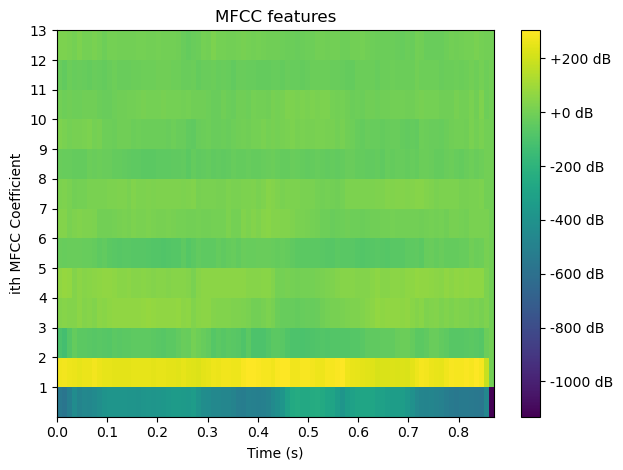

In [102]:
shift_dur = 10
mfcc_feat = mfcc(y, sr,20,'hann',shift_dur)
num_frames=mfcc_feat.shape[1]
time_vector=(np.arange(0, num_frames) * (shift_dur / 1000.0))
print(mfcc_feat.shape)
print(time_vector.shape)
# Create a new figure and axis
fig, axes = plt.subplots()

# Display the MFCC features as an image
im = axes.imshow(mfcc_feat, cmap='viridis', origin='lower', aspect='auto', extent=[0, time_vector[-1], 0, 13])  # Adjust the y-axis extent
plt.colorbar(im, ax=axes, format="%+2.0f dB")
axes.set_title(f"MFCC features")
axes.set_xlabel("Time (s)")
axes.set_ylabel("ith MFCC Coefficient")

# Set y-axis ticks to represent MFCC coefficients
axes.set_yticks(np.arange(1,14))

plt.tight_layout()
plt.show()

### Observations
 - We observe that corresponding ith MFCC Coefficients have similar magnitudes across all frames
 - MFCC of voiced regions of the speech is high as compared to the other regions
 - We observe a smooth change, no sudden variations